#### bilibili
https://www.bilibili.com/video/BV14A411s7n3?spm_id_from=333.337.search-card.all.click&vd_source=457a7e6aa076083edc041f3126c610dd

#### 分析方向
- Movie/TV show distribution in different country/region, 不同内容受欢迎程度
- Actor/Director 是否会对电影受欢迎程度产生影响？
- 总结：各地区上映内容是否有侧重点；结合用户特征/喜好，在下一阶段是否有优化策略？


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
print(df.shape)
df.nunique()

(8807, 12)


show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

### Descriptive Analysis

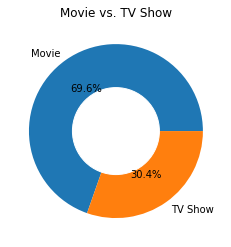

In [88]:
# Count movie/tvshow
data = df['type'].value_counts().to_list()
# Get label
label = df['type'].value_counts().index

# Pie chart
plt.pie(data,labels=label,autopct='%.1f%%')
plt.title('Movie vs. TV Show')
# Make it look better
inner_circle = plt.Circle( (0,0), 0.5, color='white')
plt.gcf().gca().add_artist(inner_circle)
plt.show()

<AxesSubplot:title={'center':'release year & type'}, xlabel='release_year', ylabel='count'>

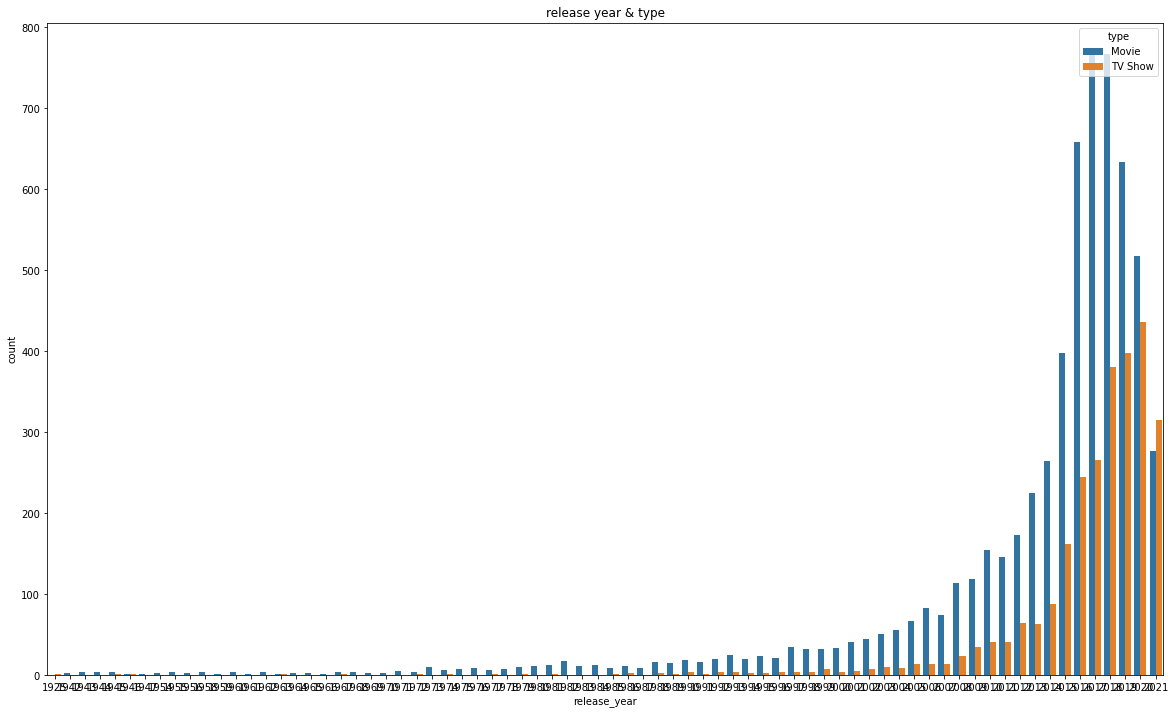

In [10]:
# By country, by type
plt.figure(figsize=(20,12))
plt.title('release year & type')
sns.countplot(x='release_year',hue='type',data=df)

Text(0.5, 1.0, 'Rating')

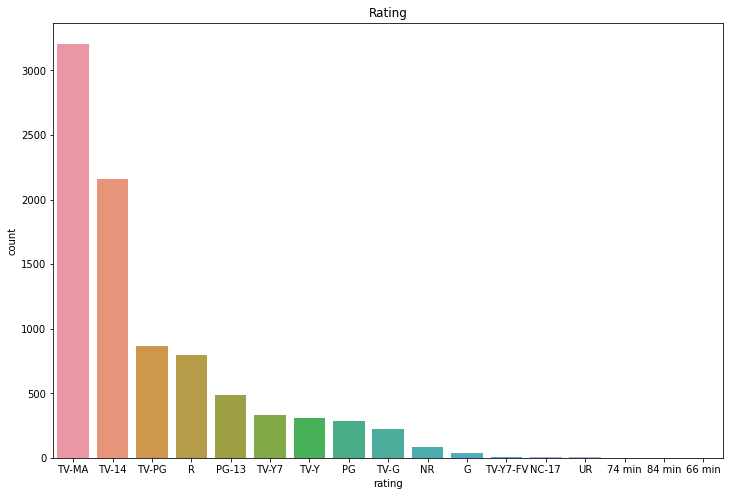

In [47]:
# rating
r = df['rating'].value_counts()

plt.figure(figsize=(12,8))
sns.countplot(x='rating',data=df,
             order = r.index)
plt.title('Rating')

#### The popular director/actor in Movie

In [76]:
# the most productive director
df[df['type']=='Movie']['director'].value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

In [63]:
# The actor/actress who present the most
actor = []
casts = df[df['type']=='Movie']['cast'].dropna()

# Creating "actor" list
for i in casts:
    actors = i.split(',')
    for j in actors:
        actor.append(j.lower().strip()) # .strip() 移除str首位的指定字符，这里是space       

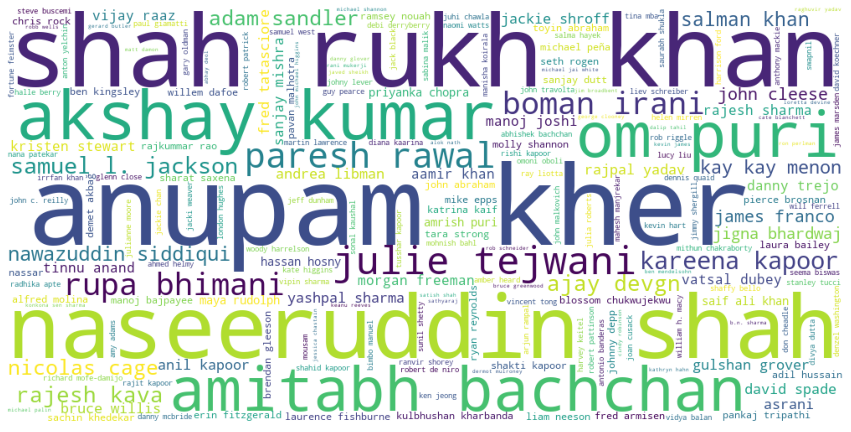

In [75]:
# Word cloud for the most popular actors

from collections import Counter
from wordcloud import WordCloud

word_could_dict=Counter(actor)
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.show() vs. plt.imshow()
https://stackoverflow.com/questions/3497578/matplotlib-plot-and-imshow

#### TV Show - Season

In [80]:
tvshow = df[df['type']=='TV Show']

season = tvshow['duration'].value_counts()
season

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

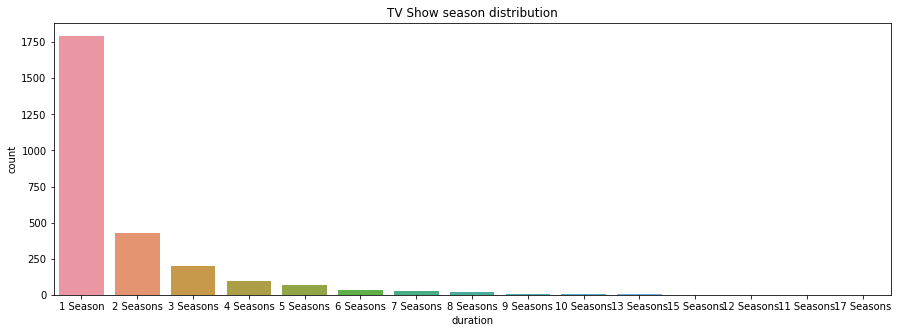

In [86]:
plt.figure(figsize=(15,5))
sns.countplot(data=tvshow, x='duration',
             order = season.index)
plt.title('TV Show season distribution')
plt.show()

### Conclusion

- Among all shows, Movie - 69.6%, TV Show - 30.4%
- In movie,
    popular director: Rajiv Chilaka 
    popular actor: Anupam Kher, Shah Rukh khan
- In TV Show, most tv shows have short duration (The number of season is few)
- 2017 & 2018 have the most number of movie released
